In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#reading the dataframe
data=pd.read_csv('creditcardfraud.csv')


In [ ]:
data.head(20)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520.0,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1.371817e+09,41.747157,-77.584197,0.0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139.0,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1.371817e+09,41.499458,-124.888729,0.0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343.0,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1.371817e+09,44.495498,-97.728453,0.0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688.0,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1.371817e+09,41.546067,-78.120238,0.0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263.0,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1.371817e+09,31.782919,-96.366185,0.0


In [ ]:
data.info()

In [ ]:
data.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,143686.000000,1.436860e+05,143686.000000,143686.000000,143686.000000,143686.000000,1.436860e+05,1.436860e+05,143686.000000,143686.000000,143686.000000
mean,71842.500000,4.197065e+17,69.606555,48847.801665,38.548512,-90.234358,8.825473e+04,1.373958e+09,38.547413,-90.234840,0.004364
std,41478.719727,1.312443e+18,153.039149,26864.611677,5.075868,13.746753,3.001193e+05,1.260781e+06,5.112223,13.759926,0.065914
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.042320,-166.671575,0.000000
25%,35921.250000,1.800429e+14,9.650000,26292.000000,34.668900,-96.809400,7.410000e+02,1.372887e+09,34.758788,-96.909707,0.000000
50%,71842.500000,3.519607e+15,47.415000,48174.000000,39.371600,-87.476900,2.408000e+03,1.373931e+09,39.382948,-87.425888,0.000000
75%,107763.750000,4.634956e+15,83.010000,72042.000000,41.948800,-80.175200,1.968500e+04,1.375019e+09,41.965355,-80.274430,0.000000
max,143685.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.376145e+09,66.669356,-66.952352,1.000000


In [ ]:
#Handle the missing values
data=data.dropna()
data

In [ ]:
#remove duplicate data
data=data.drop_duplicates()
data

In [ ]:
#data visualization
#flag 0--legitime
#fla 1--fraudant
plt.figure(figsize=(10,20))
sns.boxplot(y='amt',x='is_fraud',data=data)
plt.title("Transaction Amount Distributinon fraud vs legitimate")
plt.xlabel('is_fraud')
plt.ylabel('amt')
plt.show()


In [ ]:
#count plot
plt.figure(figsize=(30,20))
sns.countplot(x='state',data=data,hue='is_fraud')
plt.title('Trend based on the state of the transaction')
plt.show()

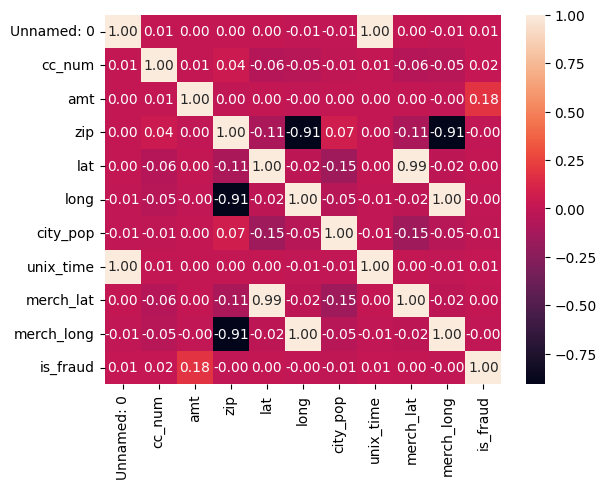

In [ ]:
#visulizing the correation btw diffrent features using heatmap
correlation=data.corr(numeric_only=True)
sns.heatmap(data=correlation,annot=True,fmt='.2f')
plt.show()

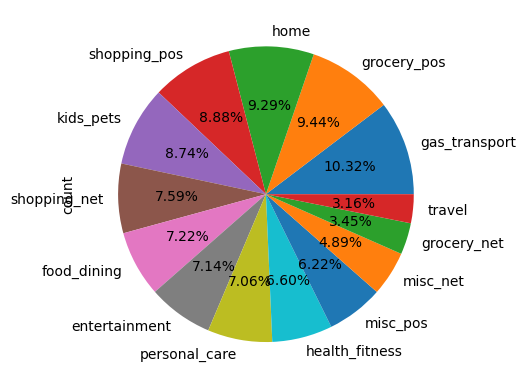

In [ ]:
#pie plot
data['category'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()